# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combine_data_df=pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice=len(combine_data_df["Mouse ID"].unique())
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=combine_data_df.duplicated(subset=[ 'Mouse ID','Timepoint'],keep=False)
combine_data_df[duplicate_mice]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combine_data_df[duplicate_mice]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combine_data_df.loc[combine_data_df["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice_2=len(clean_df["Mouse ID"].unique())
number_of_mice_2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()

median_tumor=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()

variance_tumor=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()

std_tumor=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()

sem_tumor=clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
Summary_Statistics=pd.DataFrame({"Mean Tumor Volume":mean_tumor,
                                "Median Tumor Volume":median_tumor,
                                "Variance Tumor Volume":variance_tumor,
                                "Tumor Volume Std. Dev.":std_tumor,
                                "Tumor Volume Std. Err":sem_tumor})

Summary_Statistics

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df2 = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

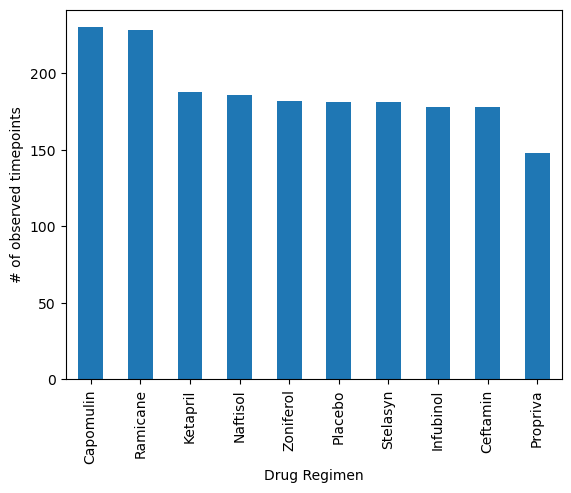

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_count=clean_df["Drug Regimen"].value_counts()
regimen_count.plot(kind='bar')
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed timepoints")
plt.show()

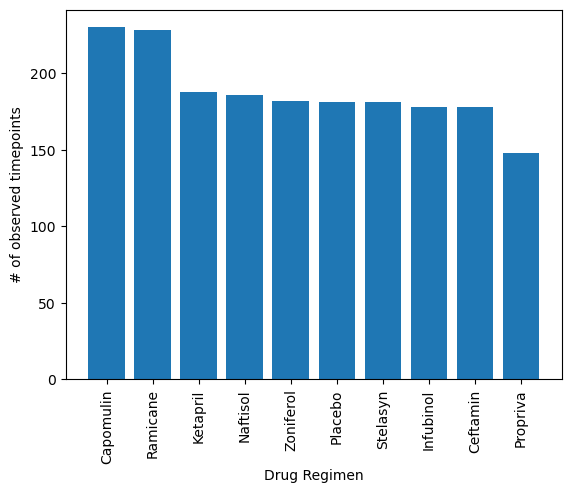

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x=regimen_count.index
y=regimen_count.values
plt.bar(x,y)
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed timepoints")
plt.xticks(rotation=90)
plt.show()


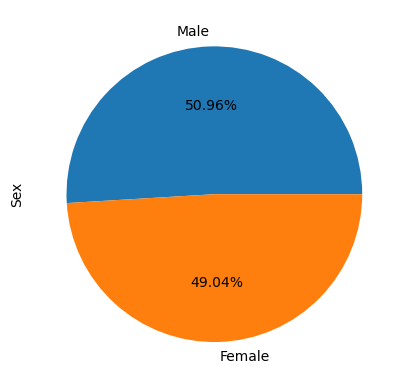

In [11]:

# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count=clean_df["Sex"].value_counts()
gender_count.plot(kind='pie',autopct='%.2f%%')
plt.ylabel("Sex")
plt.show()

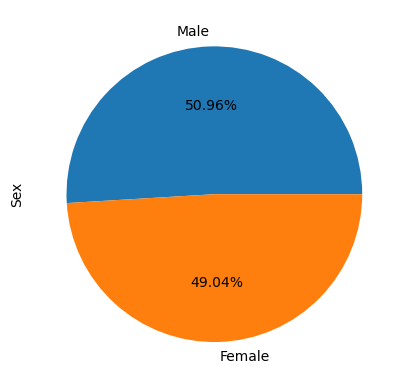

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = gender_count.values 
labels = gender_count.index
plt.pie(values, labels=labels, autopct='%.2f%%')
plt.ylabel("Sex")
plt.show()

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df=clean_df.groupby("Mouse ID")[["Timepoint"]].max().reset_index()
max_timepoint_df

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_df=pd.merge(max_timepoint_df, clean_df, how='left', on=["Mouse ID", "Timepoint"])
merge_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


## Quartiles, Outliers and Boxplots

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

#For each key treatment
for drug in treatments_list:
    print(drug)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_series = merge_df['Drug Regimen'] == drug
    drug_tumor_series = merge_df.loc[drug_series, 'Tumor Volume (mm3)']
    # add drug tumor volume series to tumor vol data list 
    tumor_vol_data.append(drug_tumor_series)
    # Calculate the IQR for this drug and quantitatively determine if there are any potential outliers. 
    quartiles = drug_tumor_series.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    upper_bounds = upperq + (1.5 * iqr)
    lower_bounds = lowerq - (1.5 * iqr)
    #print(f'lower bounds: {lower_bounds}')
    outliers = drug_tumor_series[(drug_tumor_series < lower_bounds) | (drug_tumor_series > upper_bounds)]
    print(outliers)
print(tumor_vol_data)  
    
    
    
   


Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
merge_df['Drug Regimen'] == drug

0      False
1      False
2      False
3       True
4      False
       ...  
243    False
244    False
245    False
246    False
247    False
Name: Drug Regimen, Length: 248, dtype: bool

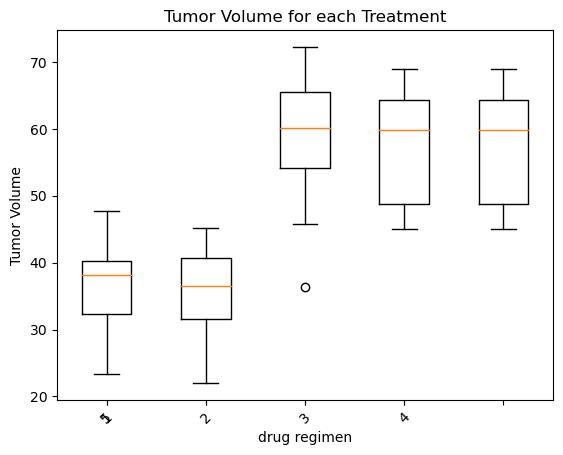

In [22]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume for each Treatment')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('drug regimen')
plt.xticks([1,2,3,4], treatments_list, rotation=45)
ax1.boxplot(tumor_vol_data)

plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
tumor_vol_data.plot(kind="scatter", x="mouse weight", y="average tumor volume", grid=True, figsize=(8,8),
              title="Mouse Weight Vs. Average Tumor Volume")
plt.show()

AttributeError: 'list' object has no attribute 'plot'

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
